In [1]:
# Import Numpy and Matplotlib
import numpy as np
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
%matplotlib inline

# To Choose Random Lines for Visualization
import random

# For Clustering
import pandas as pd
import seaborn as sns
import sklearn.cluster as cluster

In [2]:
# Read the Data Cube
omega_datalist = np.load('omega_datalist.npy',allow_pickle='TRUE').item()

In [3]:
# Organize and Make Datetimes Readable
datetimes = []
for x in omega_datalist:
    x = x.replace('Time ', '')
    datetimes.append(x)
datetimes.sort()

# FWHM Lists for both Ranges
datetimeFWHM_5to6k_allmeans = []
datetimeFWHM_7to8k_allmeans = []

# Create both FWHM Lists
for datetime in datetimes:
    FWHM_5to6k = []
    FWHM_7to8k = []
    
    if datetime == '20210208T191024':
        continue
        
    for order in omega_datalist['Time '+str(datetime)]:
        for line in omega_datalist['Time '+str(datetime)][str(order)]:
            centroid = omega_datalist['Time '+str(datetime)][str(order)][str(line)]['centroid']
            sigma = omega_datalist['Time '+str(datetime)][str(order)][str(line)]['sigma']
            
            FWHM = sigma * 2.3548
            
            if 5000 <= centroid <= 6000:
                FWHM_5to6k.append(FWHM)
            if 7000 <= centroid <= 8000:
                FWHM_7to8k.append(FWHM)
                
    FWHM_5to6k_mean = np.mean(FWHM_5to6k)
    datetimeFWHM_5to6k_allmeans.append(FWHM_5to6k_mean)
    FWHM_7to8k_mean = np.mean(FWHM_7to8k)
    datetimeFWHM_7to8k_allmeans.append(FWHM_7to8k_mean)

In [4]:
# Universal Graph Styling
COLOR = 'k'
plt.style.use(['ggplot'])
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.rcParams["font.family"] = "Helvetica"
plt.rcParams.update({'figure.max_open_warning': 0})

Bluer lines have a width of 12.062503158251852 pixels
Redder lines have a width of 10.78325490434693 pixels
The difference between both line widths is 1.2792482539049228 pixels


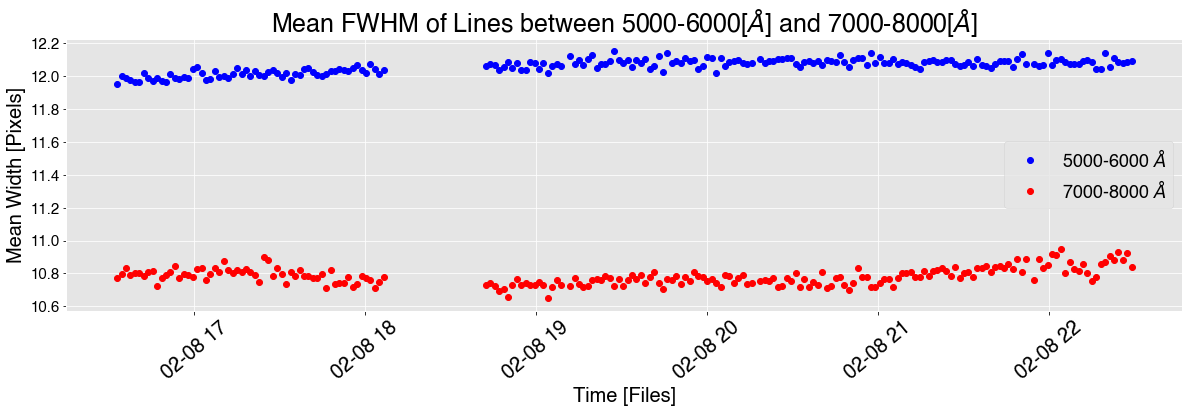

In [5]:
# Prepare Arrays for Plotting
redder = np.array(datetimeFWHM_7to8k_allmeans)
bluer = np.array(datetimeFWHM_5to6k_allmeans)

# Organize and Make Datetimes Readable
import datetime
formatted_dates = []
datetimes.remove('20210208T191024')
np_datetimes = np.array(datetimes)
for datetime_value in np_datetimes:
    d = datetime.datetime.strptime(datetime_value, '%Y%m%dT%H%M%S')
    formatted_dates.append(d)
dates = mdates.date2num(formatted_dates)

# Plot the Mean FWHM Values over Time
plt.figure(figsize=(20,5))
plt.plot_date(dates, bluer, color='blue', label='5000-6000 $\AA$')
plt.plot_date(dates, redder, color='red', label='7000-8000 $\AA$')
plt.title('Mean FWHM of Lines between 5000-6000[$\AA$] and 7000-8000[$\AA$]', fontsize=25)
plt.xlabel('Time [Files]', fontsize=20)
plt.ylabel('Mean Width [Pixels]', fontsize=20)
plt.xticks(fontsize=20, rotation=40)
plt.yticks(fontsize=15)
plt.legend(prop={'size': 18})

# Get the Average Line Widths
redder_lw = np.mean(redder)
bluer_lw = np.mean(bluer)

# Print Results
print("Bluer lines have a width of", bluer_lw, "pixels")
print("Redder lines have a width of", redder_lw, "pixels")
print("The difference between both line widths is", bluer_lw - redder_lw, "pixels")

In [6]:
# Generate Five Random Lines to get Depth over Time
dl_1,dl_2,dl_3,dl_4,dl_5 = [],[],[],[],[]
for x in range(5):
    random_fileval = random.choice(datetimes)
    random_orderval = random.randint(40,110)
    random_order = omega_datalist['Time '+str(random_fileval)]['Order '+str(random_orderval)]
    
    linelist_len = 0
    for linelist in random_order:
        linelist_len += 1
    random_lineval = random.randint(0, linelist_len-1)   
    
    append_name = 'dl_'+str(x+1)
    for datetime in datetimes:
        depth = omega_datalist['Time '+str(datetime)]['Order '+str(random_orderval)]['Line '+str(random_lineval)]['norm_amplitude']
        centroid = omega_datalist['Time '+str(datetime)]['Order '+str(random_orderval)]['Line '+str(random_lineval)]['centroid']
        
        if x == 0:
            dl_1.append((depth, centroid)) 
        if x == 1:
            dl_2.append((depth, centroid)) 
        if x == 2:
            dl_3.append((depth, centroid)) 
        if x == 3:
            dl_4.append((depth, centroid)) 
        if x == 4:
            dl_5.append((depth, centroid)) 

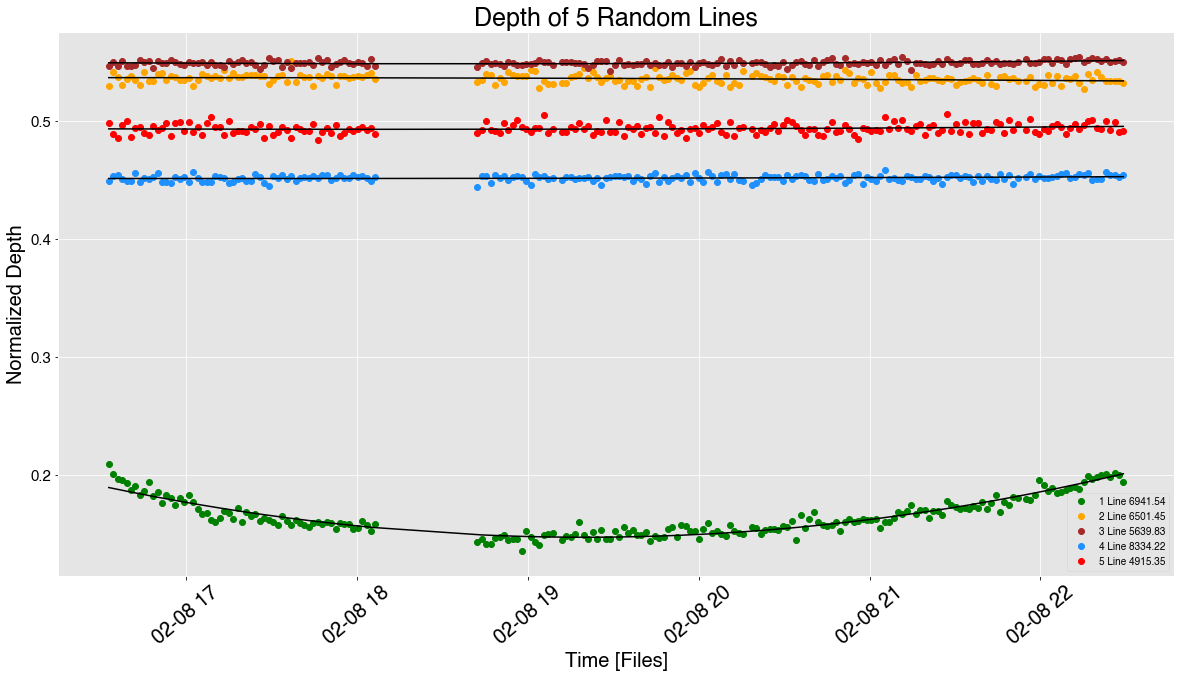

In [7]:
# Organize and Make Datetimes Readable
import datetime
formatted_dates = []
for datetime_value in np_datetimes:
    d = datetime.datetime.strptime(datetime_value, '%Y%m%dT%H%M%S')
    formatted_dates.append(d)
dates = mdates.date2num(formatted_dates)

# Prepare Lists of Depths
dl_1depths = list(zip(*dl_1))[0]
dl_2depths = list(zip(*dl_2))[0]
dl_3depths = list(zip(*dl_3))[0]
dl_4depths = list(zip(*dl_4))[0]
dl_5depths = list(zip(*dl_5))[0]

# Fit a Polynomial to each Line
fit1 = np.polyfit(dates, dl_1depths, 2)
yp1 = np.polyval(fit1, dates)
fit2 = np.polyfit(dates, dl_2depths, 2)
yp2 = np.polyval(fit2, dates)
fit3 = np.polyfit(dates, dl_3depths, 2)
yp3 = np.polyval(fit3, dates)
fit4 = np.polyfit(dates, dl_4depths, 2)
yp4 = np.polyval(fit4, dates)
fit5 = np.polyfit(dates, dl_5depths, 2)
yp5 = np.polyval(fit5, dates)

# Plot the Depths over Time
plt.figure(figsize=(20,10))
plt.plot_date(dates, dl_1depths, color='green', label='1 Line '+str(round(dl_1[1][1], 2)))
plt.plot_date(dates, dl_2depths, color='orange', label='2 Line '+str(round(dl_2[1][1], 2)))
plt.plot_date(dates, dl_3depths, color='brown', label='3 Line '+str(round(dl_3[1][1], 2)))
plt.plot_date(dates, dl_4depths, color='dodgerblue', label='4 Line '+str(round(dl_4[1][1], 2)))
plt.plot_date(dates, dl_5depths, color='red', label='5 Line '+str(round(dl_5[1][1], 2)))
plt.plot(dates, yp1, color='#000')
plt.plot(dates, yp2, color='#000')
plt.plot(dates, yp3, color='#000')
plt.plot(dates, yp4, color='#000')
plt.plot(dates, yp5, color='#000')
plt.title('Depth of 5 Random Lines', fontsize=25)
plt.xlabel('Time [Files]', fontsize=20)
plt.ylabel('Normalized Depth', fontsize=20)
plt.xticks(fontsize=20, rotation=40)
plt.yticks(fontsize=15)
plt.legend()

In [8]:
# Get the 'a' value in (ax^2 + bx + c) for each polynomial fit
# value > 1 are of interest
a, b, c, d, e = fit1[0], fit2[0], fit3[0], fit4[0], fit5[0]
print(1, a)
print(2, b)
print(3, c)
print(4, d)
print(5, e)

1 3.1241922850996358
2 -0.04824188913627559
3 0.10914417559486782
4 0.033305931303082355
5 0.0786429542489005


In [9]:
# Collect Depth and Centroid values for Plot
big_list = []
datetime = random.choice(datetimes)
for order in omega_datalist['Time '+str(datetime)]:
    for line in omega_datalist['Time '+str(datetime)][str(order)]:
        depth = omega_datalist['Time '+str(datetime)][str(order)][str(line)]['norm_amplitude']
        if depth>=1:
            continue
        centroid = omega_datalist['Time '+str(datetime)][str(order)][str(line)]['centroid']

        big_list.append((depth, centroid, datetime))

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

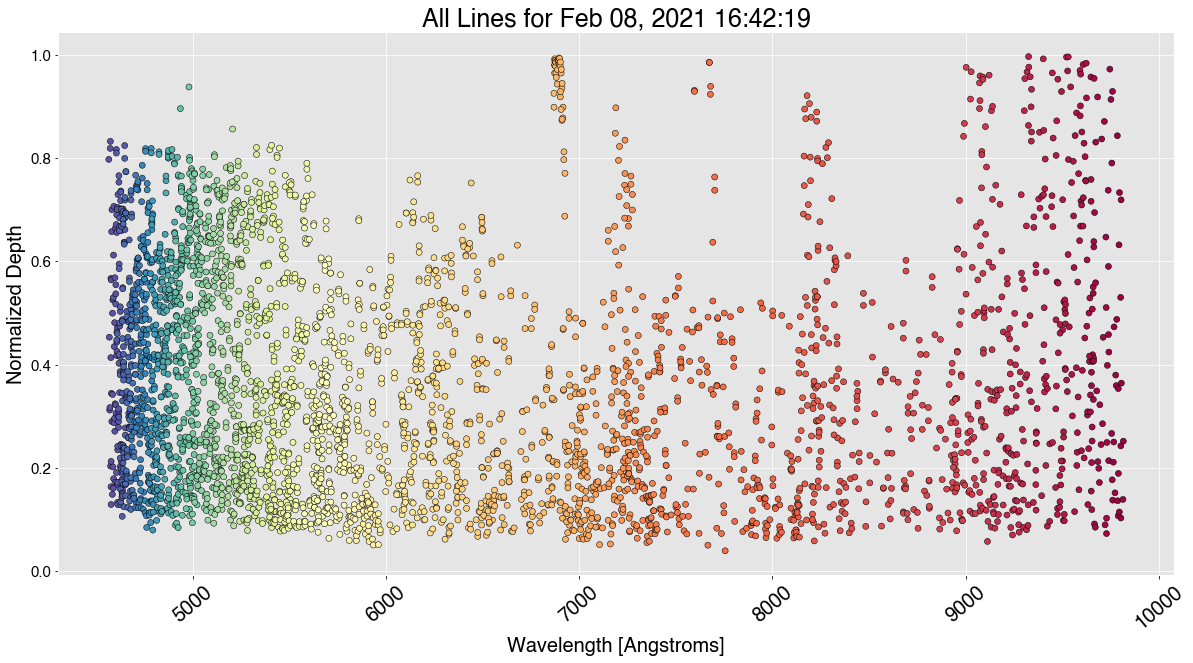

In [10]:
# Plot Depths against Centroids for Single Time (Feb 08, 2021 16:42:19)
big_list_depths = list(zip(*big_list))[0]
big_list_centroids = list(zip(*big_list))[1]
big_list_datetimes = list(zip(*big_list))[2]

plt.figure(figsize=(20,10))
cm = plt.cm.get_cmap('Spectral_r')
z = range(np.shape(big_list_centroids)[0])
plt.scatter(big_list_centroids, big_list_depths, c=z, cmap=cm, edgecolors='black')
plt.title('All Lines for Feb 08, 2021 16:42:19', fontsize=25)
plt.xlabel('Wavelength [Angstroms]', fontsize=20)
plt.ylabel('Normalized Depth', fontsize=20)
plt.xticks(fontsize=20, rotation=40)
plt.yticks(fontsize= 15)

In [11]:
# Prepare Nested Dictionary for Pandas
nested_dict = {}
count = 0
for order in omega_datalist['Time 20210208T164219']:
    
    for line in omega_datalist['Time 20210208T164219'][order]:
        nested_dict[count] = {}
        nested_dict[count]['Centroid'] = omega_datalist['Time 20210208T164219'][order][line]['centroid']
        nested_dict[count]['Depth'] = omega_datalist['Time 20210208T164219'][order][line]['norm_amplitude']
        nested_dict[count]['Sigma'] = omega_datalist['Time 20210208T164219'][order][line]['sigma']
        nested_dict[count]['Skew'] = omega_datalist['Time 20210208T164219'][order][line]['skew']
        
        count += 1

In [12]:
# Create Readable Dataframe for single Time (Feb 08 2021 16:42:19)
df = pd.DataFrame.from_dict(nested_dict,orient='index')
df.sort_values(by=['Centroid'])
df

,Centroid,Depth,Sigma,Skew
0,4565.043606,0.805971,5.5,0.252057
1,4567.801254,0.440715,4.0,0.784314
2,4569.611595,0.304197,4.5,0.719261
3,4570.020782,1.008527,7.0,0.161797
4,4570.867372,0.328221,6.5,-0.105420
...,...,...,...,...
4114,9803.497617,0.119467,7.0,-0.013025
4115,9804.388700,0.789514,5.5,0.306356
4116,9805.936116,0.403013,5.0,0.498160
4117,9814.223717,0.137303,6.0,0.112184


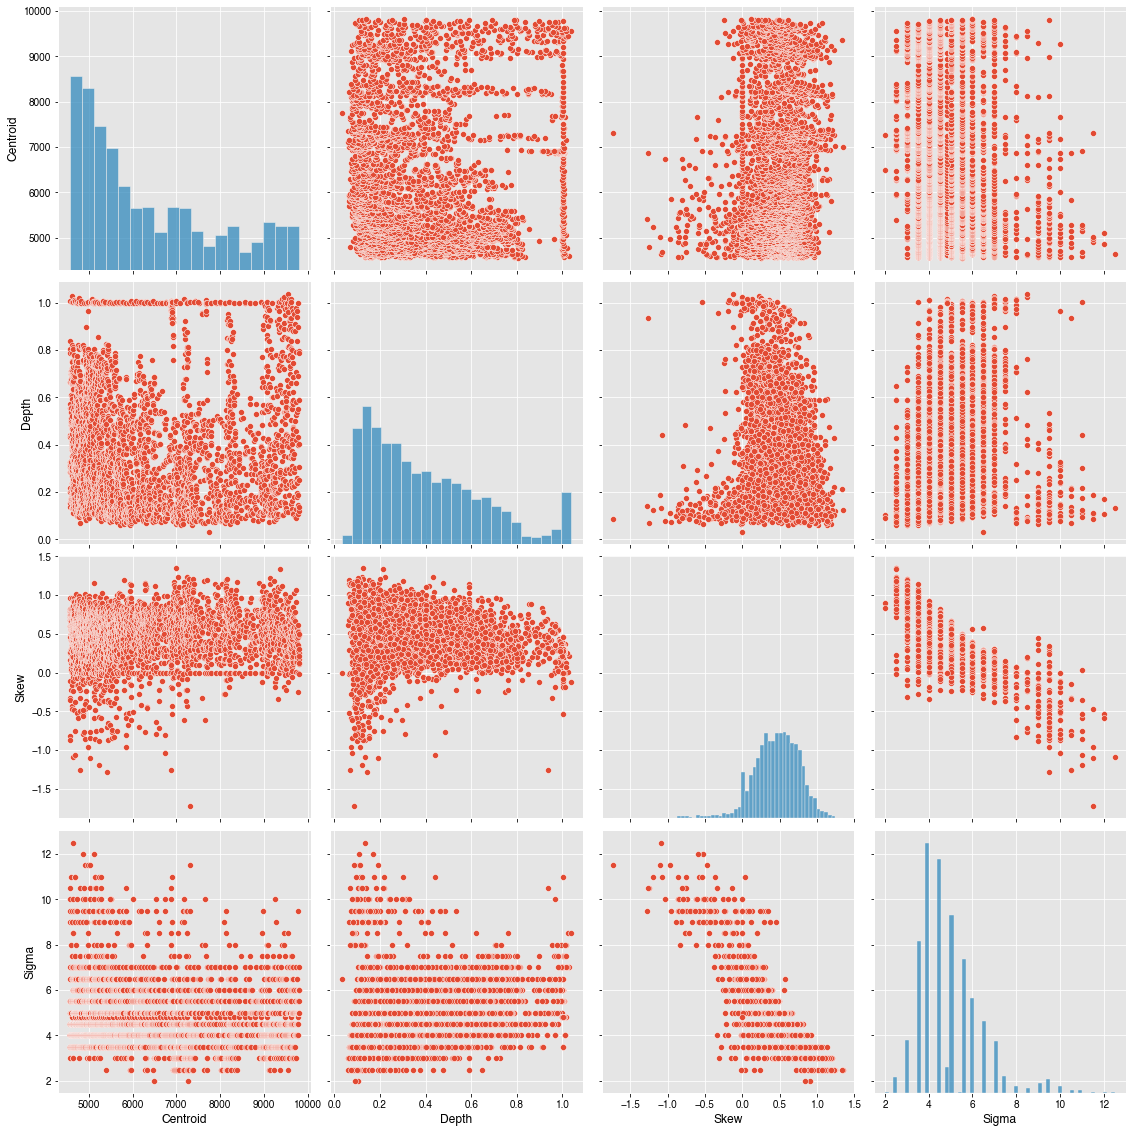

In [13]:
# Pair Plots for Different Parameters
sns.pairplot(df[['Centroid', 'Depth', 'Skew', 'Sigma']], height=4)

In [14]:
# Set Center Coordinates for Clustering Test Data
cluster_center_1x, cluster_center_1y = 5, 3
cluster_center_2x, cluster_center_2y = 12, 20
cluster_center_3x, cluster_center_3y = 12, 50

# Append Initial Center Coordinates to Lists
x, y = [], []
x.append(5), y.append(3), x.append(12), y.append(20), x.append(12), y.append(50)

# Generate Cluster of 10 Points around Center Values
for _ in range(10):
    cluster_center_1xp = cluster_center_1x + random.uniform(-1, 1)
    cluster_center_1xy = cluster_center_1y + random.uniform(-1, 1)
    x.append(cluster_center_1xp)
    y.append(cluster_center_1xy)
    
    cluster_center_2xp = cluster_center_2x + random.uniform(-1, 1)
    cluster_center_2xy = cluster_center_2y + random.uniform(-1, 1)
    x.append(cluster_center_2xp)
    y.append(cluster_center_2xy)

    cluster_center_3xp = cluster_center_3x + random.uniform(-1, 1)
    cluster_center_3xy = cluster_center_3y + random.uniform(-1, 1)
    x.append(cluster_center_3xp)
    y.append(cluster_center_3xy)

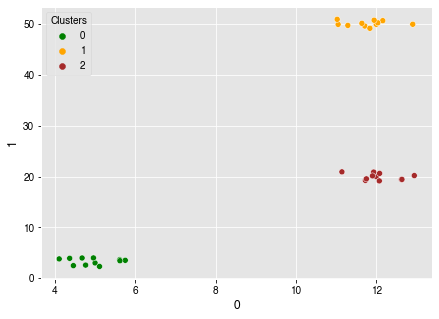

In [20]:
# Stack List Data and Create Dataframe
list_data = np.stack((x, y), axis=1)
df = pd.DataFrame(list_data)

# Sklearn K-Means Clustering
kmeans = cluster.KMeans(n_clusters=3, init='k-means++')
kmeans = kmeans.fit(df[[0, 1]])
df['Clusters'] = kmeans.labels_

# Plot Clustered Test Data
sns.scatterplot(x=0, y=1, hue='Clusters', data=df, palette=['green','orange','brown'])
plt.rcParams['figure.figsize']=(7,5)

In [16]:
# Generate 10 Random Lines to get Depth over Time for Clustering
dl_1,dl_2,dl_3,dl_4,dl_5,dl_6,dl_7,dl_8,dl_9,dl_10 = [],[],[],[],[],[],[],[],[],[]
for x in range(10):
    random_fileval = random.choice(datetimes)
    random_orderval = random.randint(40,110)
    random_order = omega_datalist['Time '+str(random_fileval)]['Order '+str(random_orderval)]
    
    linelist_len = 0
    for linelist in random_order:
        linelist_len += 1
    random_lineval = random.randint(0, linelist_len-1)   
    
    append_name = 'dl_'+str(x+1)
    for datetime in datetimes:
        depth = omega_datalist['Time '+str(datetime)]['Order '+str(random_orderval)]['Line '+str(random_lineval)]['norm_amplitude']
        centroid = omega_datalist['Time '+str(datetime)]['Order '+str(random_orderval)]['Line '+str(random_lineval)]['centroid']
        
        if x == 0:
            dl_1.append((depth, centroid)) 
        if x == 1:
            dl_2.append((depth, centroid)) 
        if x == 2:
            dl_3.append((depth, centroid)) 
        if x == 3:
            dl_4.append((depth, centroid)) 
        if x == 4:
            dl_5.append((depth, centroid)) 
        if x == 5:
            dl_6.append((depth, centroid)) 
        if x == 6:
            dl_7.append((depth, centroid)) 
        if x == 7:
            dl_8.append((depth, centroid)) 
        if x == 8:
            dl_9.append((depth, centroid)) 
        if x == 9:
            dl_10.append((depth, centroid)) 

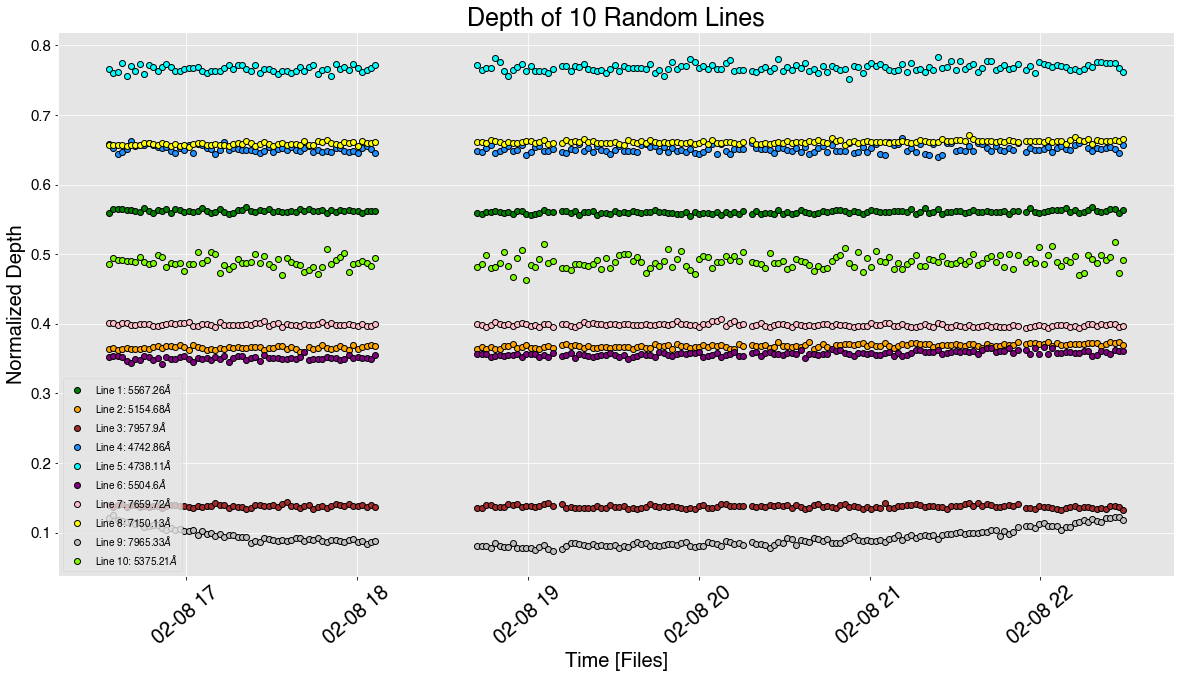

In [17]:
# Organize and Make Datetimes Readable
import datetime
formatted_dates = []
for datetime_value in np_datetimes:
    d = datetime.datetime.strptime(datetime_value, '%Y%m%dT%H%M%S')
    formatted_dates.append(d)
dates = mdates.date2num(formatted_dates)

# Prepare Lists of Depths
dl_1depths = list(zip(*dl_1))[0]
dl_2depths = list(zip(*dl_2))[0]
dl_3depths = list(zip(*dl_3))[0]
dl_4depths = list(zip(*dl_4))[0]
dl_5depths = list(zip(*dl_5))[0]
dl_6depths = list(zip(*dl_6))[0]
dl_7depths = list(zip(*dl_7))[0]
dl_8depths = list(zip(*dl_8))[0]
dl_9depths = list(zip(*dl_9))[0]
dl_10depths = list(zip(*dl_10))[0]

# Plot the Depths over Time
plt.figure(figsize=(20,10))
plt.plot_date(dates, dl_1depths, color='green', markeredgewidth=1,markeredgecolor='0', label='Line 1: '+str(round(dl_1[1][1], 2))+'$\AA$')
plt.plot_date(dates, dl_2depths, color='orange', markeredgewidth=1,markeredgecolor='0', label='Line 2: '+str(round(dl_2[1][1], 2))+'$\AA$')
plt.plot_date(dates, dl_3depths, color='brown', markeredgewidth=1,markeredgecolor='0', label='Line 3: '+str(round(dl_3[1][1], 2))+'$\AA$')
plt.plot_date(dates, dl_4depths, color='dodgerblue', markeredgewidth=1,markeredgecolor='0', label='Line 4: '+str(round(dl_4[1][1], 2))+'$\AA$')
plt.plot_date(dates, dl_5depths, color='aqua', markeredgewidth=1,markeredgecolor='0', label='Line 5: '+str(round(dl_5[1][1], 2))+'$\AA$')
plt.plot_date(dates, dl_6depths, color='purple', markeredgewidth=1,markeredgecolor='0', label='Line 6: '+str(round(dl_6[1][1], 2))+'$\AA$')
plt.plot_date(dates, dl_7depths, color='pink', markeredgewidth=1,markeredgecolor='0', label='Line 7: '+str(round(dl_7[1][1], 2))+'$\AA$')
plt.plot_date(dates, dl_8depths, color='yellow', markeredgewidth=1,markeredgecolor='0', label='Line 8: '+str(round(dl_8[1][1], 2))+'$\AA$')
plt.plot_date(dates, dl_9depths, color='silver', markeredgewidth=1,markeredgecolor='0', label='Line 9: '+str(round(dl_9[1][1], 2))+'$\AA$')
plt.plot_date(dates, dl_10depths, color='lawngreen', markeredgewidth=1,markeredgecolor='0', label='Line 10: '+str(round(dl_10[1][1], 2))+'$\AA$')
plt.title('Depth of 10 Random Lines', fontsize=25)
plt.xlabel('Time [Files]', fontsize=20)
plt.ylabel('Normalized Depth', fontsize=20)
plt.xticks(fontsize=20, rotation=40)
plt.yticks(fontsize=15)
plt.legend()